In [2]:
import os
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv("bank-full.csv",encoding = 'utf-8',delimiter =";")

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA and Visualisation

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
#checking for information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
#checking with type of our data 
df.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [12]:
#checking for any null values 
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
#checking for duplicate values 
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


### One hot encoding

In [14]:
df2 = pd.get_dummies(df,columns = ['job','marital','education','poutcome','contact','month' ])

In [15]:
df2.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
#custom binary  encoding of binary op variables 
df2['default'] = np.where(df2['default'].str.contains("yes"),1,0)
df2['housing'] = np.where(df2['housing'].str.contains("yes"),1,0)
df2['loan'] = np.where(df2['loan'].str.contains("yes"),1,0)
df2['y'] = np.where(df2['y'].str.contains("yes"),1,0)


In [17]:
#to check all columns 
pd.set_option("display.max.columns", None)
df2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
df2.shape

(45211, 49)

In [19]:
import warnings
warnings.filterwarnings('ignore')

# Feature Engineering 


## Recursive elimination Method

In [24]:
#splitting our variables into x and y
x = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [25]:
#feature extraction
model_1 = LogisticRegression()

In [26]:
rfe = RFE(model_1)

In [27]:
fit = rfe.fit(x,y)

In [28]:
#num features 
fit.n_features_

24

In [29]:
#selected features 
fit.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [30]:
#feature ranking 
fit.ranking_

array([16,  1, 24,  1,  1, 15, 25,  5, 22, 21,  1,  7,  1, 17, 20, 19,  1,
        1,  1,  1,  1, 14,  3,  2, 12, 11,  8,  6, 10, 18,  1,  1,  1, 23,
       13,  4,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [31]:
#checking for columns required 
for i,col in zip(range(x.shape[1]),x.columns):
    print(f"{col} selected = {fit.support_[i]} rank = {fit.ranking_[i]}")

age selected = False rank = 16
default selected = True rank = 1
balance selected = False rank = 24
housing selected = True rank = 1
loan selected = True rank = 1
day selected = False rank = 15
duration selected = False rank = 25
campaign selected = False rank = 5
pdays selected = False rank = 22
previous selected = False rank = 21
y selected = True rank = 1
job_admin. selected = False rank = 7
job_blue-collar selected = True rank = 1
job_entrepreneur selected = False rank = 17
job_housemaid selected = False rank = 20
job_management selected = False rank = 19
job_retired selected = True rank = 1
job_self-employed selected = True rank = 1
job_services selected = True rank = 1
job_student selected = True rank = 1
job_technician selected = True rank = 1
job_unemployed selected = False rank = 14
job_unknown selected = False rank = 3
marital_divorced selected = False rank = 2
marital_married selected = False rank = 12
marital_single selected = False rank = 11
education_primary selected = Fal

In [32]:
#selecting our columns from elimination method
df3 = df2[["default","housing","loan","job_blue-collar","job_unknown","job_retired",
                  "job_services","education_primary","education_secondary","poutcome_failure",
                   "poutcome_success","month_apr",
                   "month_dec","month_feb",
                   "month_jul","month_jun","month_mar",
                   "month_may","month_oct","y"]]

In [33]:
#checking with our selected columns
df3.head()

,default,housing,loan,job_blue-collar,job_unknown,job_retired,job_services,education_primary,education_secondary,poutcome_failure,poutcome_success,month_apr,month_dec,month_feb,month_jul,month_jun,month_mar,month_may,month_oct,y
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
#checking with  shape of our data
df3.shape

(45211, 20)

# Validation of Model

##  K-fold Cross Validator

In [35]:
# Validation of the selected features in the dataset 
array = df3.values
x = array[:,0:19]
y = array[:,19]

In [43]:
kfold = KFold(n_splits = 10)
model_2 = LogisticRegression()
results = cross_val_score(model_2,x,y,cv = kfold)

In [44]:
results

array([0.97014595, 0.96261889, 0.95178058, 0.9358549 , 0.93895156,
       0.93452776, 0.89095333, 0.86817076, 0.84251272, 0.53948242])

In [45]:
results.mean()*100

88.34998861766617

In [46]:
#rechecking our selected ccolumns with information gain plot
df4 = df3[["default","housing","loan","job_blue-collar","job_unknown","job_retired",
                  "job_services","education_primary","education_secondary","poutcome_failure",
                   "poutcome_success","month_apr",
                   "month_dec","month_feb",
                   "month_jul","month_jun","month_mar",
                   "month_may","month_oct","y"]]

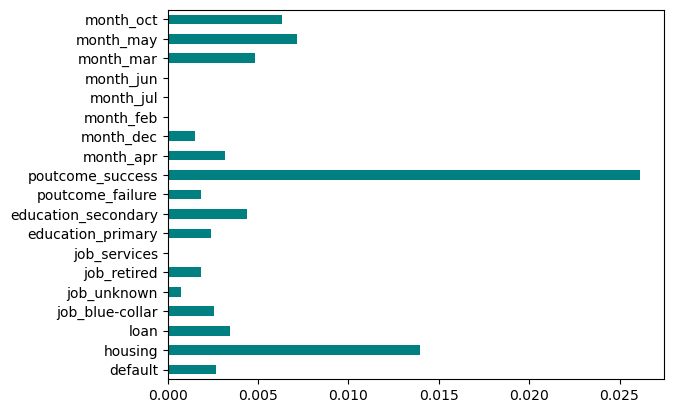

In [47]:
#plotting our information gain plot
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

importances = mutual_info_classif(x,y)
feat_importances = pd.Series(importances,df3.columns[0:len(df3.columns)-1])
feat_importances.plot(kind = 'barh',color ='teal')
plt.show()

# Building our final Model 
# The model has accuracy of 88.34 %

In [48]:
x = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

In [49]:
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

# Predicting our Model

In [50]:
#computing our predictions on term deposit
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
#storing our actual and predicted values
y_pred_df4 = pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df4

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,1
45209,0,0


# Testing the accuracy of our Model

In [52]:
# Confusion matrix on our model
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39420,   502],
       [ 4335,   954]], dtype=int64)

In [53]:
#model accuracy is calculated as (a+d)/(a+b+c+d)
(39420+954)/(39420 + 502 +4335 +954)

0.8930127623808365

In [54]:
#as accuracy is greater than 0.5; thus [:,1] threshold value is > 0.5 =1
#else thresshold value less than 0.5 = 0
classifier.predict_proba(x)[:,1]

array([0.06784361, 0.0578082 , 0.03730793, ..., 0.71313065, 0.09794074,
       0.11451808])

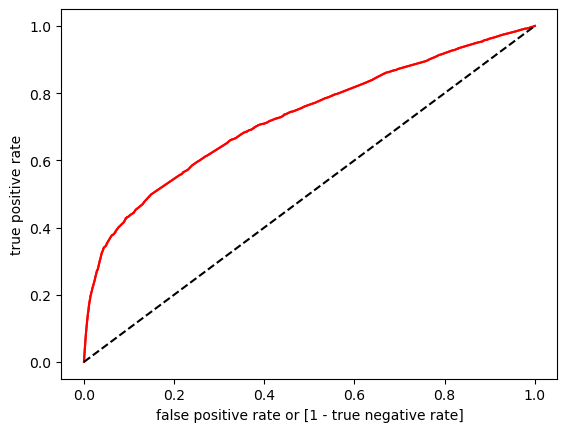

auc accuracy: 0.5838999207842701


In [55]:
#ROC curve plotting and finding AUC score 
fpr,tpr,thresholds = roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color = 'red')
auc = roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color = 'red',label = 'logit model(area =% 0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate or [1 - true negative rate]')
plt.ylabel('true positive rate')
plt.show()

print('auc accuracy:', auc)

In [56]:
#classification report 
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.66      0.18      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.78      0.58      0.61     45211
weighted avg       0.87      0.89      0.87     45211

